In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Data preprocessing

In [2]:
df = pd.read_csv('../data/salary.csv')
df = df[['salary', 'yearsworked']]

In [3]:
df.head()

,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
4,34731.0,2


In [4]:
df.describe(include='all')

,salary,yearsworked
count,513.000000,514.000000
mean,50863.220098,12.852140
std,12685.132358,9.444695
min,29000.000000,0.000000
25%,40000.000000,4.000000
50%,50096.000000,12.000000
75%,60345.000000,22.000000
max,96156.000000,41.000000


In [5]:
df.isnull().sum()

salary         1
yearsworked    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

salary         0
yearsworked    0
dtype: int64

I found that there is one missing value that is found in `salary` column. The model will not be able to process the value and it is only one instance of it, so I have decided to drop. It won't make any significant difference when the value is dropped.

# Training the Model

In [8]:
import sys

sys.path.append('../src')

import testing_model
import training_model

In [9]:
training_model.train(df)

0.5486071187591077


The model returned the accuracy of `54.68%`. This means the model will be somewhat successful in predicting the correct values. It is not very high though. This could be that you can't predict the salary a person will earn according to the years they have worked. There could be more factors to it, such as the type of job or the years absent.

# Testing the Model

In [14]:
predictions= testing_model.test(df)
predictions.head()

Coefficient: [802.17199669]
Intercept: 40635.45707853393


,Predicted Salary,Actual Value
0,57481.069009,64794.59766
1,48657.177045,42813.00000
2,60689.756996,52662.00000
3,63096.272986,71118.00000
4,59887.584999,62173.00000


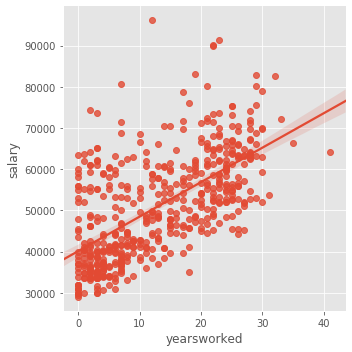

In [11]:
testing_model.scatterplot(df, 'yearsworked')

The graph above shows the relationship between `salary` and `yearsworked`. As you can see, there is a positive correlation between the variables. This means, on average, the longer you work the more likely you are to earn more. There outliers, such as someone earning more than `90 000` but has worked for less than `15 years`.

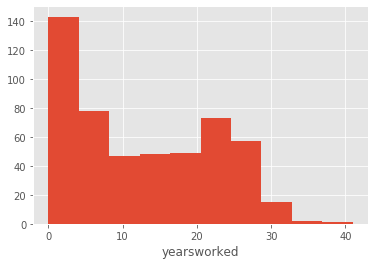

In [12]:
testing_model.histplot(df, 'yearsworked')

# P value and Variance

In [15]:
import scipy.stats as stats

In [16]:
stats.pearsonr(df.yearsworked, df.salary)

(0.6235888657598052, 1.2873351342912745e-56)